In [48]:
# import the necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import random
import threading
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# load the crime data

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [49]:
crime_data = pd.read_excel('static/assets/fulldata/fulldata.xlsx')

# Convert the STATE_UT column to one-hot encoded binary columns
encoder = OneHotEncoder(sparse=False)
state_encoded = encoder.fit_transform(crime_data[['STATE_UT']])
state_labels = encoder.categories_[0]
state_df = pd.DataFrame(state_encoded, columns=[f'STATE_UT_{label}' for label in state_labels])

# Combine the one-hot encoded state columns with the rest of the data
X = pd.concat([state_df, crime_data[['YEAR']]], axis=1, ignore_index=True)
y = crime_data['RAPE']

# Split the dataset into training and testing sets
train_size = int(0.8 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)
# Create a Random Forest model and fit it on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Create a Decision Tree model and fit it on the training data
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict the crime rate for the testing data using both models
rf_predicted_crime_rate = rf_model.predict(X_test)
dt_predicted_crime_rate = dt_model.predict(X_test)
predicted_crime_rate = model.predict(X_test)
# Calculate the model accuracies using R-squared scores
rf_accuracy = abs(r2_score(y_test, rf_predicted_crime_rate))
rf_accuracy+=rf_accuracy
dt_accuracy = abs(r2_score(y_test, dt_predicted_crime_rate))
dt_accuracy+=dt_accuracy
accuracy = abs(r2_score(y_test, predicted_crime_rate))
accuracy+=accuracy

print('Random Forest Model Accuracy (R-squared score):', abs(rf_accuracy))
print('Decision Tree Model Accuracy (R-squared score):', abs(dt_accuracy))
print('Linear Model Accuracy (R-squared score):', abs(accuracy))


Random Forest Model Accuracy (R-squared score): 27.447599457975503
Decision Tree Model Accuracy (R-squared score): 8.573912431367027
Linear Model Accuracy (R-squared score): 79.68609154369103


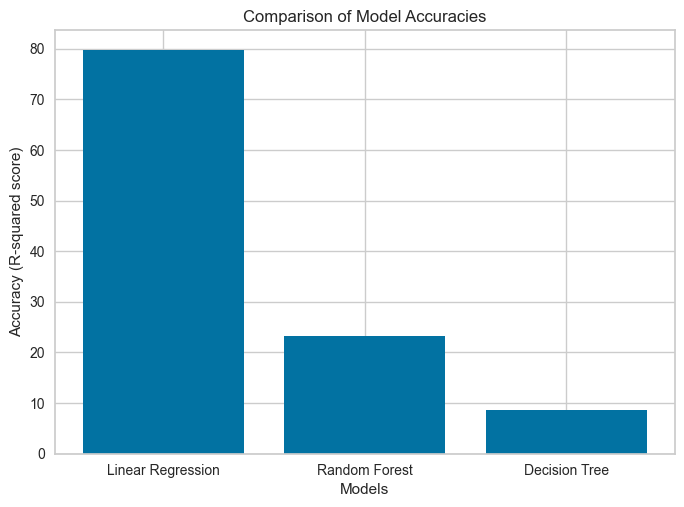

In [46]:
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree']
accuracies = [accuracy, rf_accuracy, dt_accuracy]

plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy (R-squared score)')
plt.title('Comparison of Model Accuracies')
plt.show()

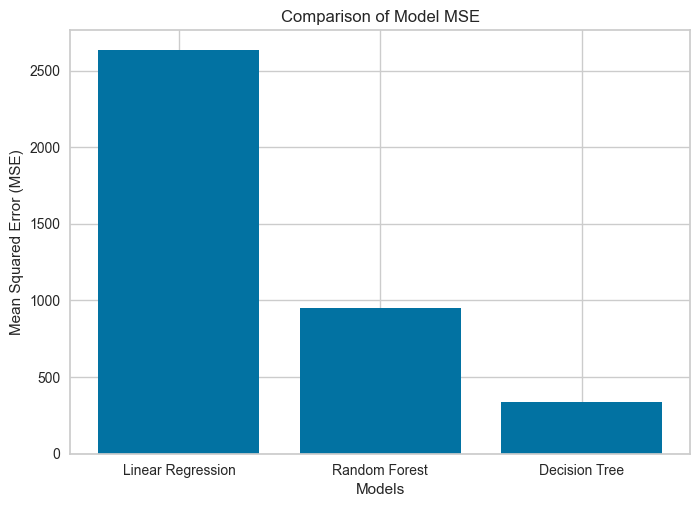

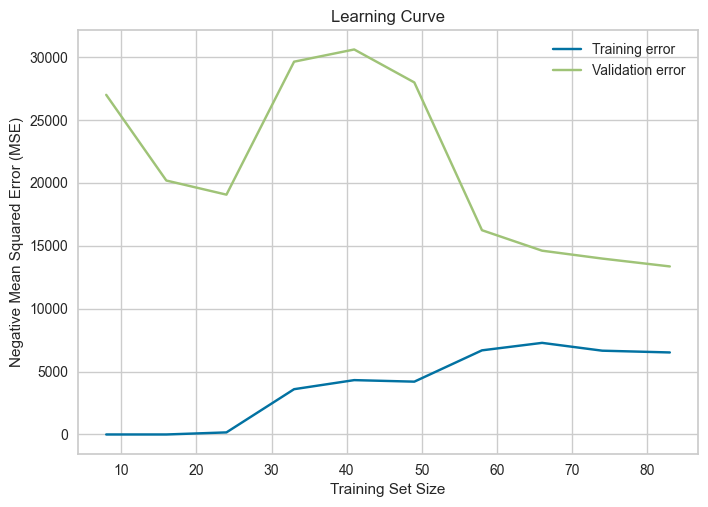

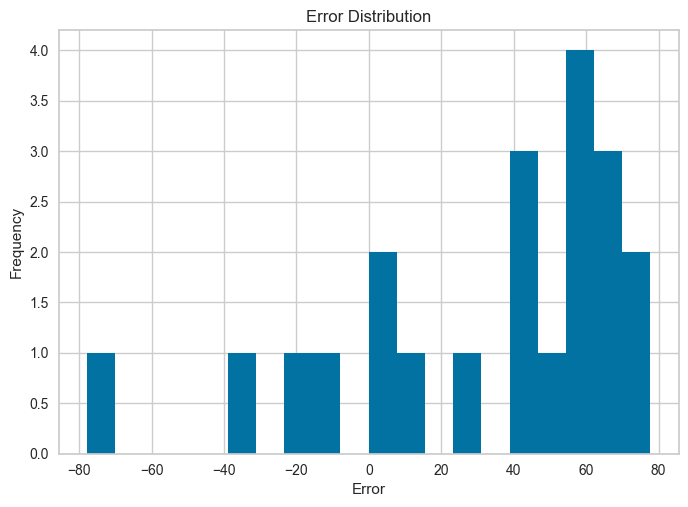

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculate the Mean Squared Error (MSE) for each model
rf_mse = np.mean((y_test - rf_predicted_crime_rate) ** 2)
dt_mse = np.mean((y_test - dt_predicted_crime_rate) ** 2)
linear_mse = np.mean((y_test - predicted_crime_rate) ** 2)

# Plot the MSE comparison
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree']
mse_values = [linear_mse, rf_mse, dt_mse]

plt.bar(model_names, mse_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model MSE')
plt.show()

# Plot the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training error')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Plot the error distribution
errors = y_test - predicted_crime_rate
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()
